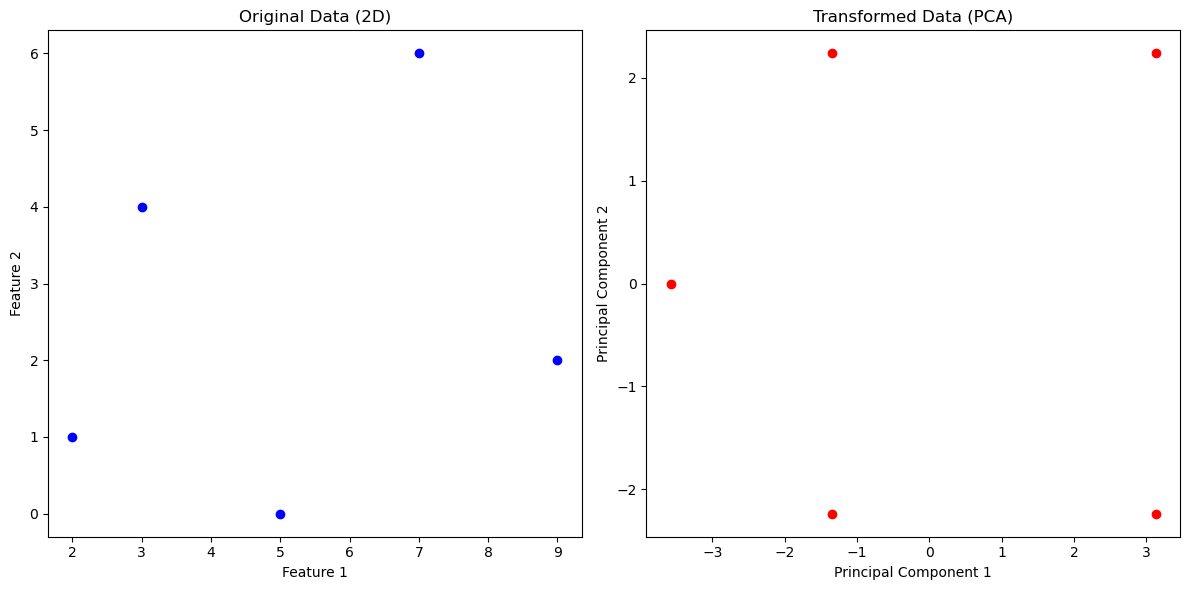

In [7]:
'''1. Consider the two dimensional data matrix [(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)].
Implement principal component analysis. Use this to obtain the feature in transformed
2D feature space. Plot the scatter plot of data points in both the original as well as
transformed domain.'''

import numpy as np
import matplotlib.pyplot as plt
def pca(data, n_components=2):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    cov_matrix = np.cov(centered_data.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    top_eigenvectors = sorted_eigenvectors[:, :n_components]
    transformed_data = np.dot(centered_data, top_eigenvectors)
    return transformed_data, top_eigenvectors
data_2d = np.array([(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)])
transformed_data_2d, eigenvectors_2d = pca(data_2d)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data_2d[:, 0], data_2d[:, 1], color='blue')
plt.title('Original Data (2D)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.subplot(1, 2, 2)
plt.scatter(transformed_data_2d[:, 0], transformed_data_2d[:, 1], color='red')
plt.title('Transformed Data (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()


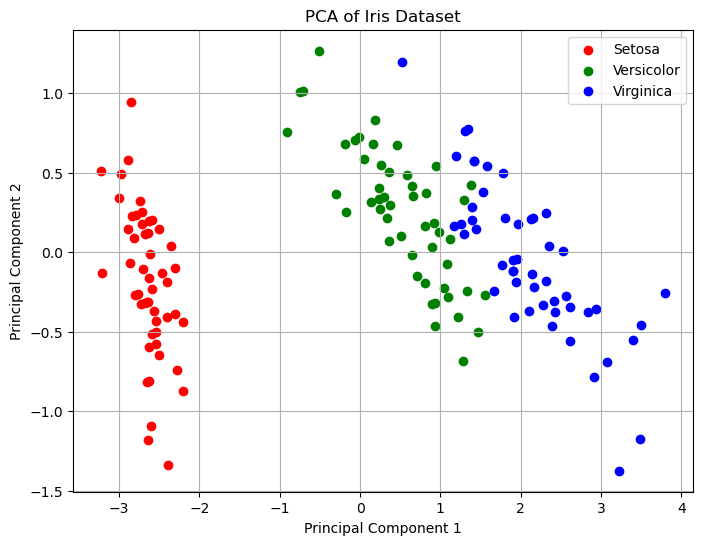

In [9]:
'''2. Implement Principal Component Analysis Algorithm and use it to reduce dimensions
of Iris Dataset (from 4D to 2D). Plot the scatter plot for samples in the transformed
domain with different colour codes for samples belonging to different classes.'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
def pca(data, n_components=2):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    cov_matrix = np.cov(centered_data.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    top_eigenvectors = sorted_eigenvectors[:, :n_components]
    transformed_data = np.dot(centered_data, top_eigenvectors)
    return transformed_data, top_eigenvectors
iris = load_iris()
X = iris.data 
y = iris.target  
transformed_data_iris, eigenvectors_iris = pca(X, n_components=2)
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
labels = ['Setosa', 'Versicolor', 'Virginica']
for i in range(len(colors)):
    plt.scatter(transformed_data_iris[y == i, 0], transformed_data_iris[y == i, 1], c=colors[i], label=labels[i])
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()